# Exploratory Data Analysis of Screentime Dataset

Kaggle DataSet Link : https://www.kaggle.com/datasets/ruchi798/analyzing-screen-time

In [1]:
import pandas as pd
import numpy as np
import plotly.express as px
import plotly.graph_objects as go
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df=pd.read_csv("/kaggle/input/analyzing-screen-time/Screentime - App Details.csv")

In [3]:
df.head()

,Date,Usage,Notifications,Times opened,App
0,08/26/2022,38,70,49,Instagram
1,08/27/2022,39,43,48,Instagram
2,08/28/2022,64,231,55,Instagram
3,08/29/2022,14,35,23,Instagram
4,08/30/2022,3,19,5,Instagram


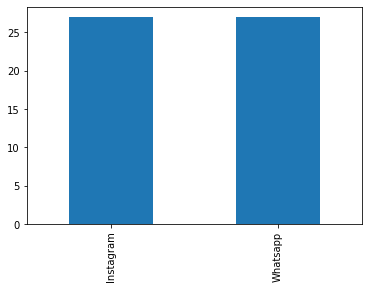

In [4]:
df.App.value_counts().plot.bar();

In [5]:
df.isnull().sum()

Date             0
Usage            0
Notifications    0
Times opened     0
App              0
dtype: int64

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54 entries, 0 to 53
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Date           54 non-null     object
 1   Usage          54 non-null     int64 
 2   Notifications  54 non-null     int64 
 3   Times opened   54 non-null     int64 
 4   App            54 non-null     object
dtypes: int64(3), object(2)
memory usage: 2.2+ KB


In [7]:
df.corr()  

,Usage,Notifications,Times opened
Usage,1.000000,0.774452,0.816409
Notifications,0.774452,1.000000,0.882983
Times opened,0.816409,0.882983,1.000000


Notifications increase the usage and times opened.

<AxesSubplot:>

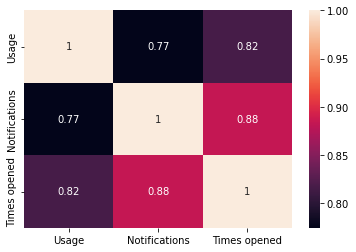

In [8]:
sns.heatmap(df.corr(),annot=True)

In [9]:
df.describe()

,Usage,Notifications,Times opened
count,54.000000,54.000000,54.000000
mean,65.037037,117.703704,61.481481
std,58.317272,97.017530,43.836635
min,1.000000,8.000000,2.000000
25%,17.500000,25.750000,23.500000
50%,58.500000,99.000000,62.500000
75%,90.500000,188.250000,90.000000
max,244.000000,405.000000,192.000000


In [10]:
fig=px.bar(df, x="Date", y="Usage", color="App", title="Usage amount of apps")
fig

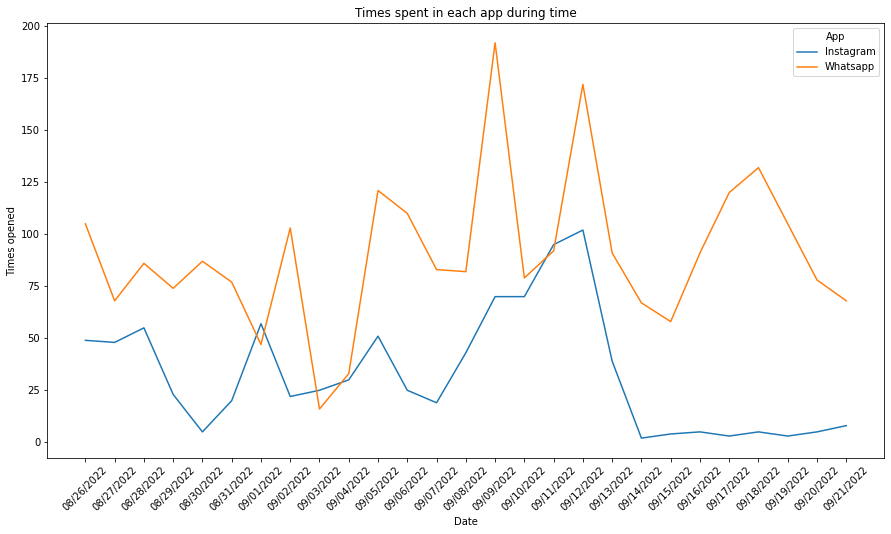

In [11]:
plt.figure(figsize=(15,8))
sns.lineplot(x=df['Date'],y=df['Times opened'],hue=df['App'])
plt.title('Times spent in each app during time')
plt.xticks(rotation=45)
plt.show()

In [12]:
fig=px.bar(df, x="Date", y="Notifications", color="App", title="Number of notifications from apps")
fig

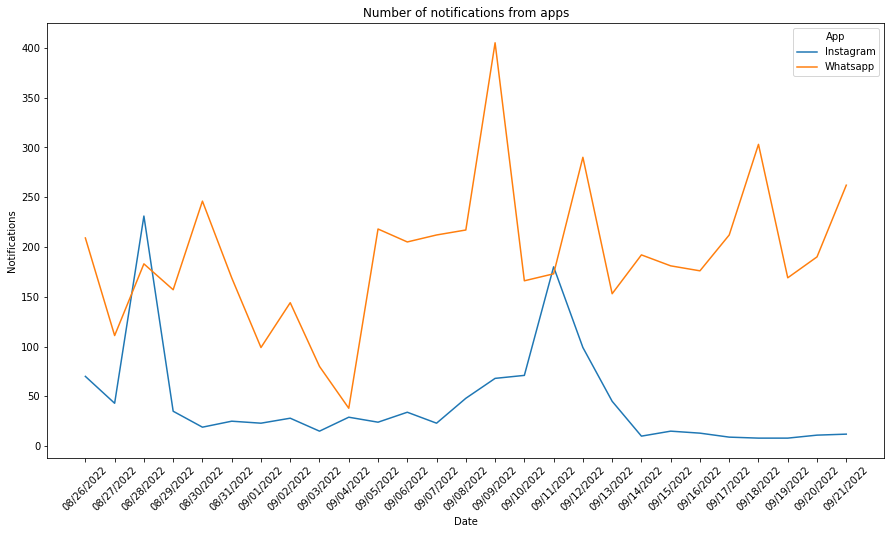

In [13]:
plt.figure(figsize=(15,8))
sns.lineplot(x=df.Date,y=df.Notifications,hue=df.App)
plt.title('Number of notifications from apps')
plt.xticks(rotation=45)
plt.show()

In [14]:
notification =df.groupby('App').agg({'Usage':'mean','Notifications':'mean','Times opened':'mean'})

In [15]:
notification

,Usage,Notifications,Times opened
App,,,
Instagram,31.148148,44.296296,32.703704
Whatsapp,98.925926,191.111111,90.259259


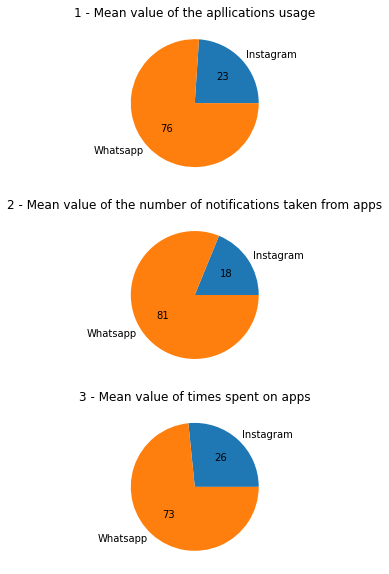

In [16]:
plt.figure (figsize=(10,10))
plt.subplot(311)
plt.title('1 - Mean value of the apllications usage')
plt.pie(x=notification.Usage,labels=notification.index,autopct='%d')
plt.subplot(312)
plt.title('2 - Mean value of the number of notifications taken from apps')
plt.pie(x=notification.Notifications ,labels=notification.index,autopct='%d')
plt.subplot(313)
plt.title('3 - Mean value of times spent on apps')
plt.pie(x=notification['Times opened'],labels=notification.index,autopct='%d')
plt.show()

#### Conclusion
There is a linear relationship between the number of notifications and the amount of usage. This means that more notifications result in more use of smartphones.

In [17]:
ranking=pd.read_csv('/kaggle/input/analyzing-screen-time/Screentime - App Ranking.csv')
ranking.head()

,Date,Rank 1,Rank 2,Rank 3
0,08/26/2022,Whatsapp,Instagram,Netflix
1,08/27/2022,Whatsapp,Instagram,Chrome
2,08/28/2022,Whatsapp,Instagram,WeChat
3,08/29/2022,Whatsapp,Chrome,WeChat
4,08/30/2022,Whatsapp,LinkedIn,Chrome


In [18]:
ranking["Rank 1"].value_counts()

Whatsapp     22
Instagram     3
Facebook      1
Zoom          1
Name: Rank 1, dtype: int64

In [19]:
px.bar(x=ranking['Rank 1'].value_counts().index,y=ranking['Rank 1'].value_counts().values,title='Number of apps in Rank 1')

In [20]:
ranking["Rank 2"].value_counts()

Instagram    8
Zoom         4
WeChat       4
Whatsapp     3
Gallery      2
Spotify      2
Chrome       1
LinkedIn     1
YouTube      1
Maps         1
Name: Rank 2, dtype: int64

In [21]:
px.bar(x=ranking['Rank 2'].value_counts().index,y=ranking['Rank 2'].value_counts().values,title='Number of apps in Rank 2')

In [22]:
ranking["Rank 3"].value_counts()

WeChat       8
Chrome       5
Instagram    5
Gmail        2
Maps         2
Netflix      1
Spotify      1
YouTube      1
Linkedin     1
Hulu         1
Name: Rank 3, dtype: int64

In [23]:
px.bar(x=ranking['Rank 3'].value_counts().index,y=ranking['Rank 3'].value_counts().values,title='Number of apps in Rank 3')

In [24]:
df = pd.get_dummies(data=ranking,columns=['Rank 1', 'Rank 2', 'Rank 3'])

In [25]:
df.sample()

,Date,Rank 1_Facebook,Rank 1_Instagram,Rank 1_Whatsapp,Rank 1_Zoom,Rank 2_Chrome,Rank 2_Gallery,Rank 2_Instagram,Rank 2_LinkedIn,Rank 2_Maps,...,Rank 3_Chrome,Rank 3_Gmail,Rank 3_Hulu,Rank 3_Instagram,Rank 3_Linkedin,Rank 3_Maps,Rank 3_Netflix,Rank 3_Spotify,Rank 3_WeChat,Rank 3_YouTube
12,09/07/2022,0,0,1,0,0,0,1,0,0,...,0,1,0,0,0,0,0,0,0,0


In [26]:
df.shape

(27, 25)

In [27]:
rank1 = set(ranking['Rank 1'].unique())
rank2 = set(ranking['Rank 2'].unique())
rank3 = set(ranking['Rank 3'].unique())

app_list = rank1.union(rank2).union(rank3)
app_list

{'Chrome',
 'Facebook',
 'Gallery',
 'Gmail',
 'Hulu',
 'Instagram',
 'LinkedIn',
 'Linkedin',
 'Maps',
 'Netflix',
 'Spotify',
 'WeChat',
 'Whatsapp',
 'YouTube',
 'Zoom'}

In [28]:
col=[]
for i in app_list:
    for name in df.columns:
        if i in name:
            col.append(name)
    print(col)
    ranking[i]=df[col].sum(axis=1)
    col=[]
ranking.drop(['Rank 1', 'Rank 2', 'Rank 3'],axis=1,inplace=True)

['Rank 2_Chrome', 'Rank 3_Chrome']
['Rank 2_Spotify', 'Rank 3_Spotify']
['Rank 1_Instagram', 'Rank 2_Instagram', 'Rank 3_Instagram']
['Rank 3_Netflix']
['Rank 3_Hulu']
['Rank 2_Maps', 'Rank 3_Maps']
['Rank 2_YouTube', 'Rank 3_YouTube']
['Rank 2_LinkedIn']
['Rank 1_Whatsapp', 'Rank 2_Whatsapp']
['Rank 3_Gmail']
['Rank 2_Gallery']
['Rank 2_WeChat', 'Rank 3_WeChat']
['Rank 1_Zoom', 'Rank 2_Zoom']
['Rank 1_Facebook']
['Rank 3_Linkedin']


In [29]:
ranking.head(5)

,Date,Chrome,Spotify,Instagram,Netflix,Hulu,Maps,YouTube,LinkedIn,Whatsapp,Gmail,Gallery,WeChat,Zoom,Facebook,Linkedin
0,08/26/2022,0,0,1,1,0,0,0,0,1,0,0,0,0,0,0
1,08/27/2022,1,0,1,0,0,0,0,0,1,0,0,0,0,0,0
2,08/28/2022,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0
3,08/29/2022,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0
4,08/30/2022,1,0,0,0,0,0,0,1,1,0,0,0,0,0,0


In [33]:
dic={}
g=ranking.drop(['Date '],axis=1)
for i in g.columns:
    a=g[i].sum()
    dic[i]=a
print(dic)
df=pd.DataFrame.from_dict(dic, orient='index')
df.index.rename('App',inplace=True)
df.rename(columns={0:'sum'},inplace=True)
df.columns

{'Chrome': 6, 'Spotify': 3, 'Instagram': 16, 'Netflix': 1, 'Hulu': 1, 'Maps': 3, 'YouTube': 2, 'LinkedIn': 1, 'Whatsapp': 25, 'Gmail': 2, 'Gallery': 2, 'WeChat': 12, 'Zoom': 5, 'Facebook': 1, 'Linkedin': 1}


Index(['sum'], dtype='object')

In [34]:
df=df.sort_values('sum',ascending=False)
df.reset_index(inplace=True)

In [35]:
px.pie(names=df.App,values=df ['sum'])

#### Conclusion
Most used app is whatsapp (then instagram) in all ranks.